In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## 1. 전처리

- outlier 처리

In [4]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

In [5]:
df_train[(df_train['GarageCars']==4) & (df_train['SalePrice'] < 300000)]

df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 300000)]

df_train = df_train.drop(df_train[df_train['Id']==333].index)

In [6]:
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [7]:
df_train.shape

(1455, 81)

In [8]:
all_data.shape

(2914, 80)

- Missing Value 처리

In [9]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

- 정규화

In [10]:
#log transform the target:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

- categorical data 처리

In [11]:
all_data = pd.get_dummies(all_data)

In [12]:
all_data.drop('Id', axis=1, inplace=True)

In [13]:
all_data.shape

(2914, 299)

In [47]:
#feature_names=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
#              'MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF']

In [63]:
#feature_names=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
#       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
#       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
#       'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'HalfBath',
#       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
#       'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'MiscVal']

In [82]:
feature_names=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'MiscVal', 'YrSold',
       'LowQualFinSF', 'BsmtHalfBath', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr']

In [83]:
#creating matrices for sklearn:
X_train = all_data[:df_train.shape[0]]
X_train = X_train[feature_names]
X_test = all_data[df_train.shape[0]:]
X_test = X_test[feature_names]
y = df_train.SalePrice

In [84]:
X_train.shape

(1455, 36)

In [85]:
X_test.shape

(1459, 36)

In [86]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## 2. 모델링(랜덤포레스트)

In [25]:
from sklearn.metrics import make_scorer

def rmse(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmse_scorer = make_scorer(rmse)
rmse_scorer

make_scorer(rmse)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
%%time 
score = cross_val_score(model, X_train, y, cv=k_fold, scoring=rmse_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Score= 0.01248
CPU times: user 3.25 s, sys: 117 ms, total: 3.37 s
Wall time: 2.01 s


In [29]:
model.fit(X_train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
predictions = np.exp(model.predict(X_test))
print(predictions.shape)
predictions[0:10]

(1459,)


array([128501.96984709, 148139.7245755 , 172607.28757917, 189271.69480166,
       198400.63014308, 181864.89828896, 170123.9764248 , 178703.36227532,
       174128.10446351, 108546.12638328])

[Text(0.5,1,'test')]

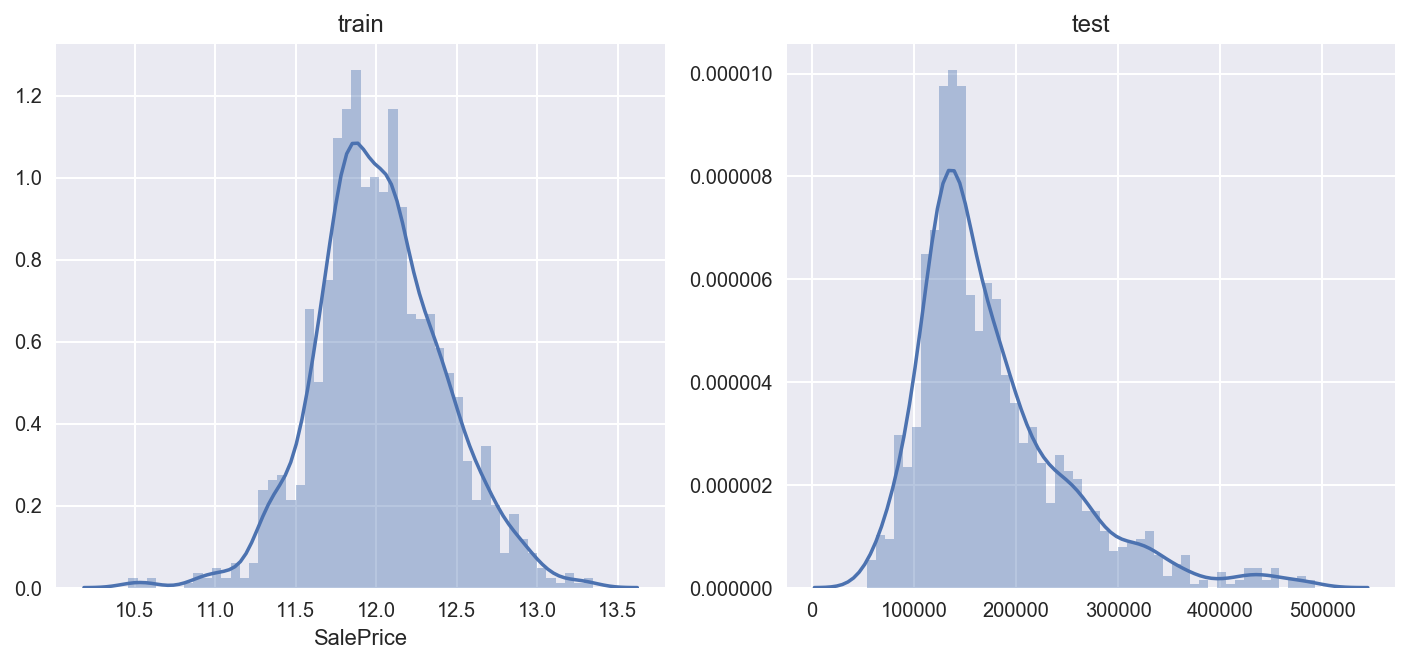

In [33]:
# graph 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [34]:
submission = pd.read_csv("../sample_submission.csv")
submission

submission["SalePrice"] = predictions

print(submission.shape)
submission.head()

(1459, 2)


,Id,SalePrice
0,1461,128501.969847
1,1462,148139.724576
2,1463,172607.287579
3,1464,189271.694802
4,1465,198400.630143


In [35]:
submission.to_csv("../Score_{0:.5f}_submission.csv".format(score), index=False)

## 2. 모델링(릿지, 라쏘)

- Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [87]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [88]:
model_ridge = Ridge()

- The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [89]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

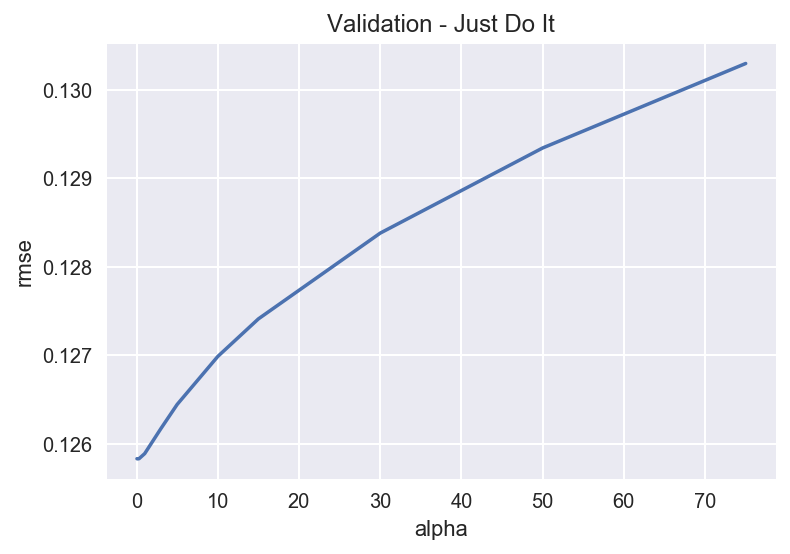

In [90]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

- Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [91]:
score = cv_ridge.min()
score

0.1258283152410632

- So for the Ridge regression we get a rmsle of about 0.151

- Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [92]:
model = Ridge(alpha=0.5).fit(X_train, y)

predictions = np.exp(model.predict(X_test))
print(predictions.shape)
predictions[0:10]

(1459,)


array([123489.40939054, 150973.15397681, 183548.63104932, 201196.37839056,
       185037.69758328, 176281.56044642, 181481.23696422, 166582.88332647,
       196820.31382899, 112328.26552341])

In [93]:
submission = pd.read_csv("../sample_submission.csv")
submission

submission["SalePrice"] = predictions

print(submission.shape)
submission.head()

(1459, 2)


,Id,SalePrice
0,1461,123489.409391
1,1462,150973.153977
2,1463,183548.631049
3,1464,201196.378391
4,1465,185037.697583


In [94]:
submission.to_csv("../Score_{0:.5f}_submission.csv".format(score), index=False)

- Lasso

In [95]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [96]:
rmse_cv(model_lasso).mean()

0.12586709613520247

- Nice! The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. Let's take a look at the coefficients:

In [97]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [98]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 34 variables and eliminated the other 2 variables


- Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

- We can also take a look directly at what the most important coefficients are:

In [99]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

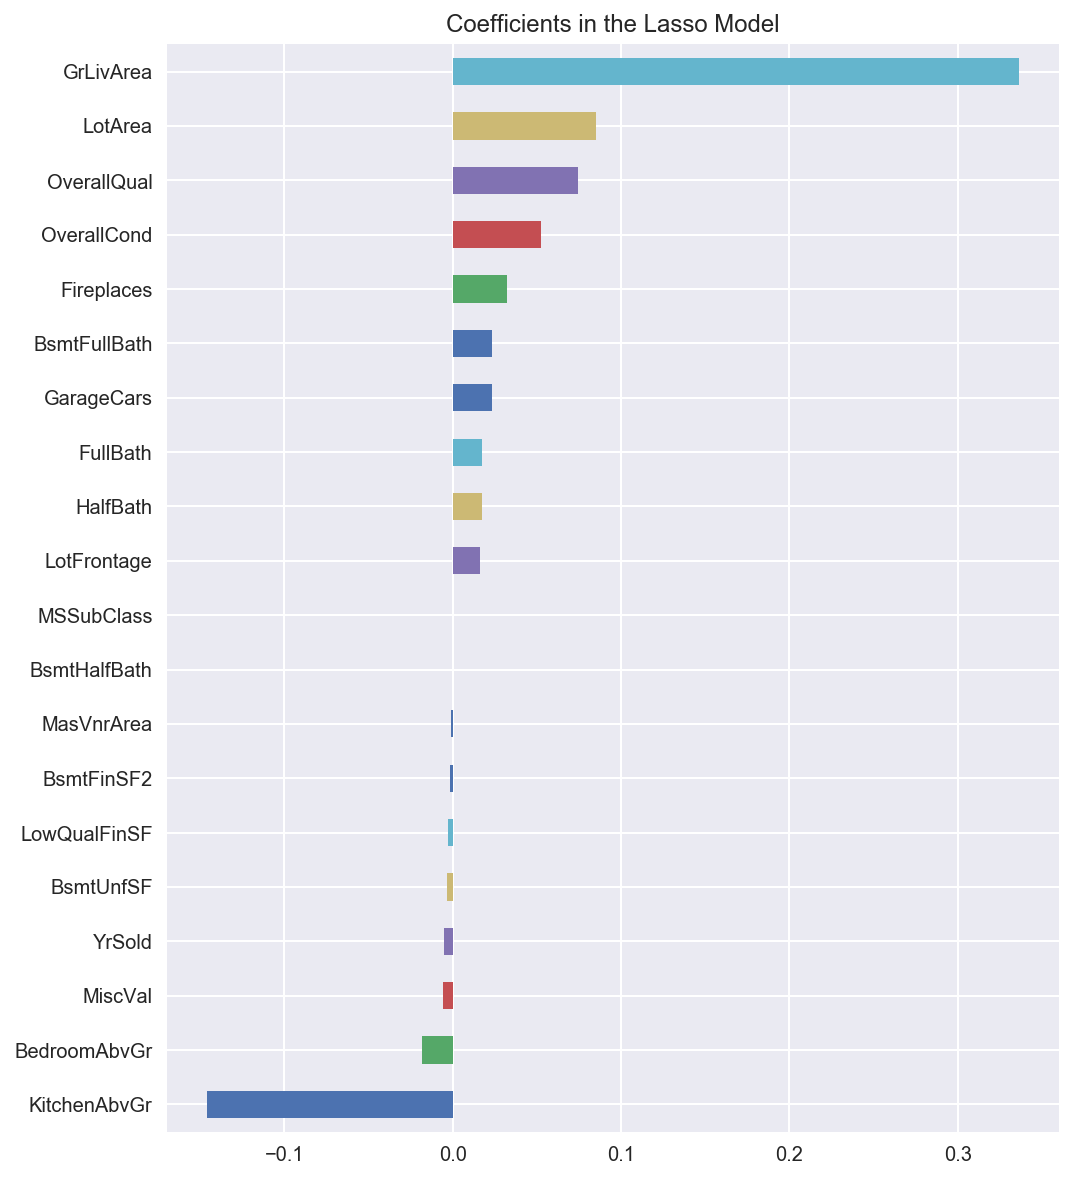

In [100]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

- The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

- Also note that unlike the feature importance you'd get from a random forest these are actual coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

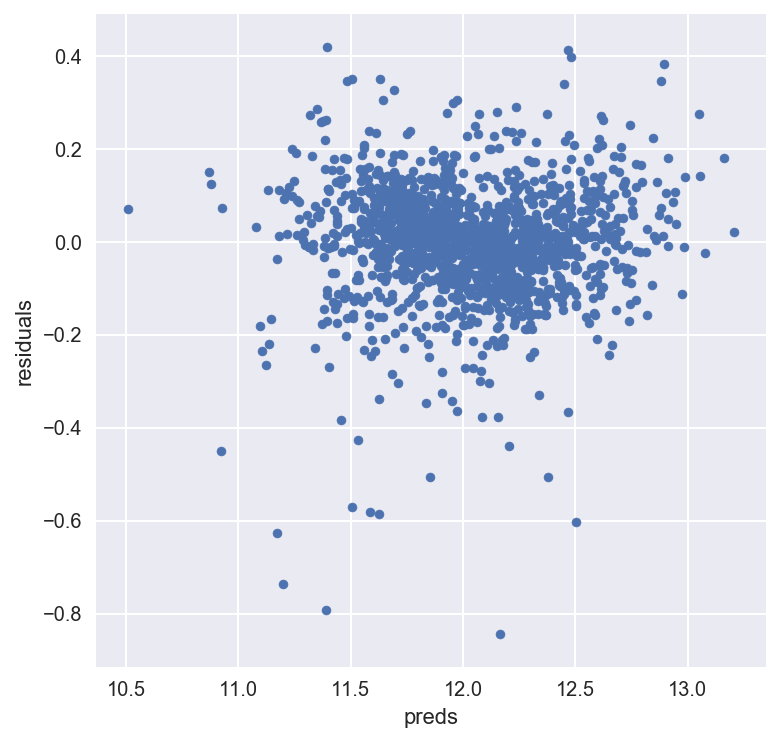

In [101]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")


- The residual plot looks pretty good.To wrap it up let's predict on the test set and submit on the leaderboard: